## The K-Nearest Neighbors Algorithm


The K-Nearest Neighbors (KNN) algorithm is a simple, yet powerful, machine learning technique used for both classification and regression. It belongs to the family of instance-based, non-parametric learning algorithms.

### Key Characteristics

**Instance-Based Learning:** KNN is an instance-based learning algorithm, meaning it doesn't explicitly learn a model. Instead, it memorizes the training dataset and uses it to make predictions.

**Non-Parametric:** Being non-parametric means KNN makes no underlying assumptions about the distribution of data. This makes it versatile in handling various types of data.



### The KNN Algorithm
The steps in the KNN algorithm are as follows:

**Choose the number of neighbors (K):** 'K' is a user-defined constant and the core deciding factor. It determines the number of nearest neighbors to consider when making a prediction.

**Calculate the distance:** For a new data point, calculate the distance from that point to all other points in the training data. Common distance metrics include Euclidean, Manhattan, and Hamming distance.

**Identify the nearest neighbors:** Select the 'K' closest data points (neighbors) after sorting them based on their distance from the new data point.

### Make predictions:

**For Classification:** The predicted class is the most frequent class among the K nearest neighbors.

**For Regression:** The prediction is typically the average of the values of its K nearest neighbors.

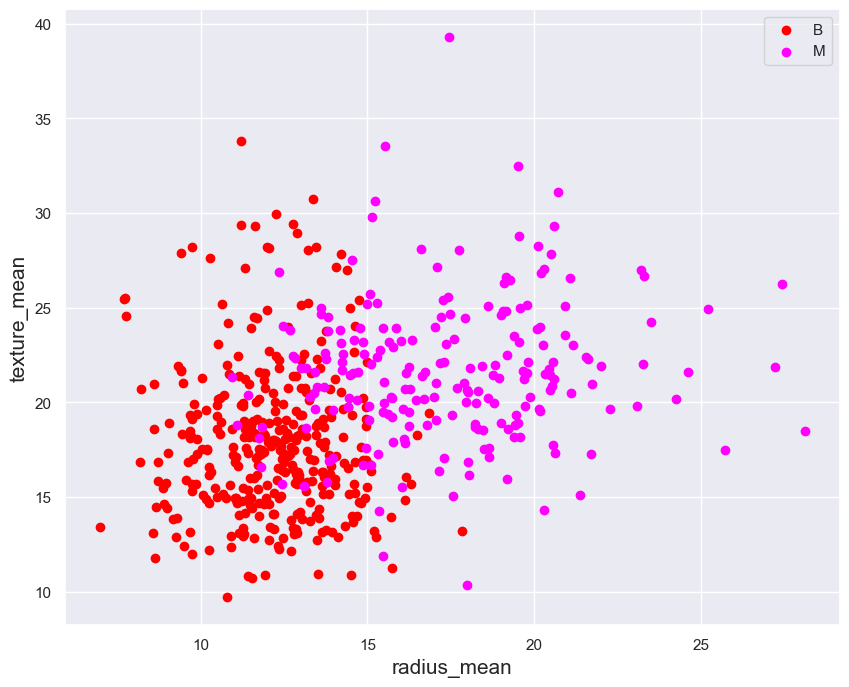

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Load the dataset
df = pd.read_csv("Cancer_Detection.csv")

# Define the status categories and their corresponding colors
Status = ["B", "M"]
colors = ["red", "magenta"]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
for species, color in zip(Status, colors):
    temp_df = df[df.diagnosis == species]  # Use species variable here
    ax.scatter(temp_df.radius_mean,
               temp_df.texture_mean,
               c=color,
               label=species)  # Use species for the label

# Set labels and legend
ax.set_xlabel("radius_mean", fontsize=15)
ax.set_ylabel("texture_mean", fontsize=15)
ax.legend()

plt.show()


In [16]:
from sklearn.model_selection import train_test_split

X = df[["radius_mean",
          "texture_mean"]].to_numpy()

y = df["diagnosis"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=1)

In [17]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 6.310633882582636


In [18]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [19]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([13.17, 21.81]), 'M', 0.2729468812791226],
 [array([13.  , 21.82]), 'M', 0.39051248379533327],
 [array([13.59, 21.84]), 'B', 0.39623225512317806],
 [array([12.77, 21.41]), 'B', 0.5536244214266575],
 [array([13.01, 22.22]), 'B', 0.7117583859709689]]

In [20]:
# Show the true label 
y_test[-1]

'B'

In [21]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [22]:
# Test our function 
KNN_Predict(X_test[20], X_train, y_train, 5)

'B'

In [23]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [24]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.15425531914893617

In [25]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

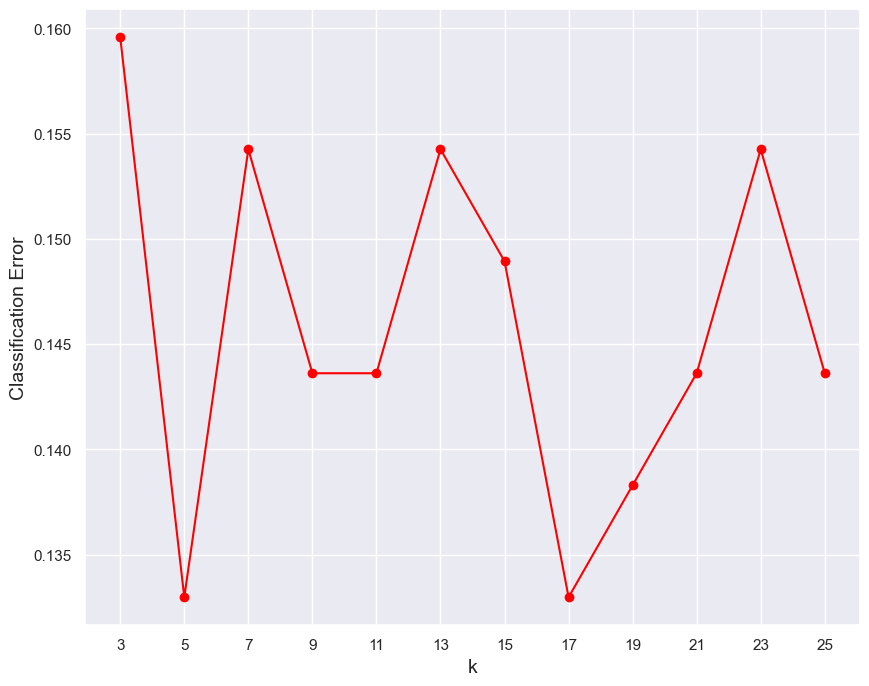

In [26]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

## Pros and Cons
### Pros:

Simple and easy to implement.

No need to build a model, tune several parameters, or make additional assumptions.

Naturally handles multi-class cases.

### Cons:

Computationally expensive, especially with large datasets, as it requires storing the entire dataset and calculating distances for each prediction.

Sensitive to irrelevant or redundant features because all features contribute to the distance calculation.

Sensitive to imbalanced data.